## Titanic DataSet

#         Developer: Krishna Agrawal

## Part I: Exploratory analysis

Reading the dataset 

In [1]:
#Importing desired database

import pandas as pd

titanic = pd.read_csv("Titanic.csv")
titanic.set_index("PassengerId", inplace=True)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
#Getting additional info like columns, datatype
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [44]:
#Exploratory analysis to better understand our data
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
#Finding number of nulls in the tables per column

column_names = titanic.columns.tolist()

for column in column_names:
    print ("Null values in {0} column are {1}".format(column, titanic[column].isnull().sum()))

Null values in Survived column are 0
Null values in Pclass column are 0
Null values in Name column are 0
Null values in Sex column are 0
Null values in Age column are 177
Null values in SibSp column are 0
Null values in Parch column are 0
Null values in Ticket column are 0
Null values in Fare column are 0
Null values in Cabin column are 687
Null values in Embarked column are 2


In [26]:
#Identifying survival rate by Sex

probability_table = pd.pivot_table(
    data = titanic,
    values = "Name",
    index = "Sex",
    columns = "Survived",
    aggfunc = "count"   
) / len(titanic)

probability_table.columns = ["Survived" if colname == 1 else "Not survived" for colname in probability_table.columns ]

probability_table

#As from the below table, it is clear that female have high survival than male

,Not survived,Survived
Sex,,
female,0.090909,0.261504
male,0.525253,0.122334


In [27]:
#Identifying survival rate by Pclass

probability_table = pd.pivot_table(
    data = titanic,
    values = "Name",
    index = "Pclass",
    columns = "Survived",
    aggfunc = "count"   
) / len(titanic)

probability_table.columns = ["Survived" if colname == 1 else "Not survived" for colname in probability_table.columns ]

probability_table

#As from the below table, it is clear that Pclass1 have high survival than other classes

,Not survived,Survived
Pclass,,
1,0.089787,0.152637
2,0.108866,0.097643
3,0.417508,0.133558


In [41]:
#Multi-diamentional Pivot table to analyse correlation between Pclass, Age with respect to survival rate

prob_survival_notsurvival = pd.pivot_table(
    data = titanic,
    values = "Name",
    index = ["Sex","Pclass"],
    columns = "Survived",
    aggfunc = "count"   
) / len(titanic)

prob_survival_notsurvival.columns = ["Survived" if colname == 1 else "Not survived" for colname in prob_survival_notsurvival.columns ]

prob_survival_notsurvival

Not survived  Survived
Sex    Pclass                        
female 1           0.003367  0.102132
       2           0.006734  0.078563
       3           0.080808  0.080808
male   1           0.086420  0.050505
       2           0.102132  0.019080
       3           0.336700  0.052750

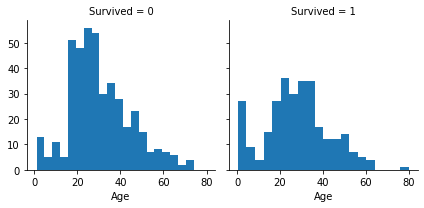

In [43]:
#Now let us look if there is any correlation in the likelyhood of survival with the age range

import seaborn as sns
import matplotlib.pyplot as plt

graph = sns.FacetGrid(titanic, col='Survived')
graph.map(plt.hist, 'Age', bins=20)


#Observations based on below graph
#1) Infants in the age range 0 - 5 years have high survival rate.
#2) Passengers in the range 20-40 have low survival rate.
#3) All the Passengers in the age group 75 above have survived.
#4) Most passengers are in the age range 20 to 40.

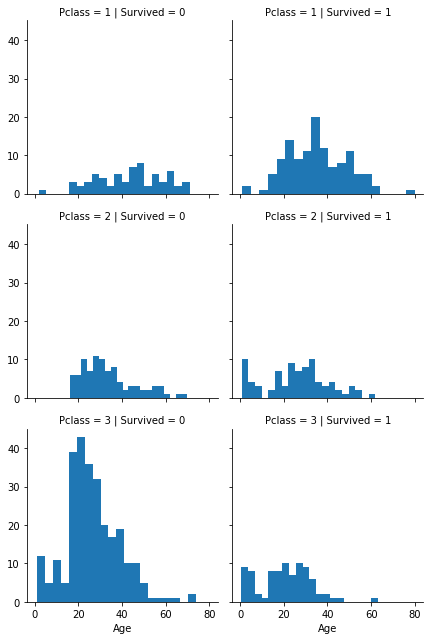

In [37]:
#Hence let's look further as there is a clear correlation between survival,age and Pclass
graph1 = sns.FacetGrid(titanic, col='Survived', row='Pclass')
graph1.map(plt.hist, 'Age', bins=20)
graph1.add_legend();

#Based on below chart, we can clearly see that the passengers in Pclass 3 had least survival rate.
#Similarly, passengers in Pclass 1 had higher survival rate
#Infants from Pclass 2 survived the most

C:\Users\krish\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\krish\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\krish\anaconda3\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


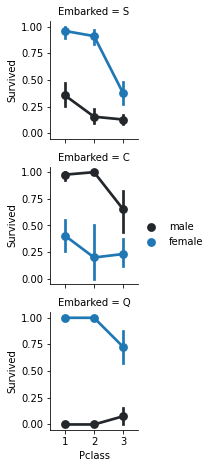

In [46]:
#Let's look into the relation betwee
graph2 = sns.FacetGrid(titanic, row='Embarked', size=2.2)
graph2.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
graph2.add_legend()

#From the below graph, as we had concluded that female in general had a highest survival rate but in Embarked =C, 
#male survival rate was more.

## Part II: More insights on the data 

1. Women in Class 1 paid more/less on average than the average women (Sex, Fare, Class) 

In [59]:
# 1. Women in Class 1 paid more/less on average than the average women #Sex, Fare, Class 

avg_price_women_class_1 = train [
        (train["Sex"]=="female")&
        (train["Pclass"]==1)]["Fare"].mean()

avg_price_paid_women = train[
        (train["Sex"]=="female")]["Fare"].mean()

price_difference = avg_price_women_class_1/avg_price_paid_women

if avg_price_women_class_1 > avg_price_paid_women:
    print(f"Women in passenger class 1 paid on average {round(price_difference, 2)} times more than the average women.")

Women in passenger class 1 paid on average 2.39 times more than the average women.


2. Men who embarked in Southampton and had no parents or children onboard are more/less likely to surivive than the average passenger (Sex, Embarked, Parch, Survive)

In [60]:
# 2. Men who embarked in Southampton and had no parents or children onboard are more/less 
  #likely to surivive than the average passenger #Sex, Embarked, Parch, Survive

men_embarked_S_and_no_parch = train[
    (train["Sex"]=="male")&
    (train["Embarked"]=="S")&
    (train["Parch"]==0)&
    (train["Survived"]==1)
]["Sex"].count()

men_embarked_S_and_no_parch_out_of_total = men_embarked_S_and_no_parch / (train["Pclass"].count())

total_survivors = train [(train["Survived"]==1)]["Pclass"].count() / (train["Pclass"].count())

if men_embarked_S_and_no_parch_out_of_total > total_survivors:
    print(f"Men who embarked in Southampton and had no parents or children onboard are more likely to survive than the average passenger.")
else: 
    print(f"Men who embarked in Southampton and had no parents or children onboard are less likely to survive than the average  passenger.")

Men who embarked in Southampton and had no parents or children onboard are less likely to survive than the average  passenger.


3. Out of passengers 30 or older, did men pay on average more/less than women for their ticket.  (Sex, Age, Fare)

In [61]:
# 3. Out of passengers 30 or older, did men pay on average more/less than women for their ticket.  #Sex, Age, Fare

male_above_age_paid_for_tickets = train[
    (train["Sex"]=="male")&
    (train["Age"] > 30) 
]["Fare"].sum()

avg_male_above_age_paid_for_tickets = male_above_age_paid_for_tickets / total_of_male

female_above_age_paid_for_tickets = train[
    (train["Sex"]=="female")&
    (train["Age"] > 30) 
]["Fare"].sum()

avg_female_above_age_paid_for_tickets = female_above_age_paid_for_tickets / total_of_female

if avg_male_above_age_paid_for_tickets > avg_female_above_age_paid_for_tickets:
    print(f"Men with age above 30 paid more on average ({avg_male_above_age_paid_for_tickets:.2f} GBP) than women ({avg_female_above_age_paid_for_tickets:.2f} GBP) with the same age when compared to their own sex.")
    
else: 
    print(f"Men with age above 30 paid less on average ({avg_male_above_age_paid_for_tickets:.2f} GBP) than women ({avg_female_above_age_paid_for_tickets:.2f} GBP) with the same age when compared to their own sex.")

Men with age above 30 paid less on average (11.44 GBP) than women (20.12 GBP) with the same age when compared to their own sex.
